In [63]:
#KMeans
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_score
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

raw_data = datasets.load_wine()
data = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)

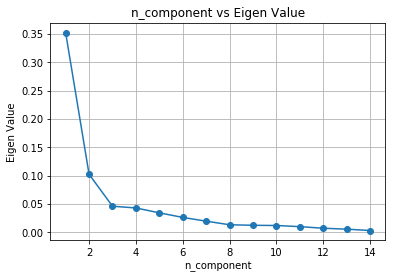

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

preprocess_pipe = make_pipeline(MinMaxScaler(), PCA())
preprocess_pipe.fit(data)
eigen_value = preprocess_pipe.named_steps['pca'].explained_variance_
plt.title('n_component vs Eigen Value')
plt.xlabel('n_component')
plt.ylabel('Eigen Value')
plt.grid()
plt.plot(np.arange(1,len(eigen_value)+1), eigen_value, '-o')
plt.show() 

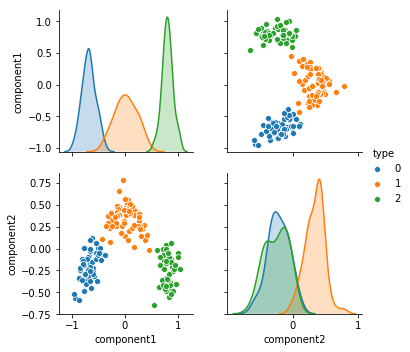

In [86]:
data_transform = preprocess_pipe.set_params(pca__n_components=2).fit_transform(data)
df = pd.DataFrame(data_transform, columns = ['component{}'.format(i) for i in [1,2]])
df['type'] = raw_data.target
sns.pairplot(df,hue='type', vars = ['component{}'.format(i) for i in [1,2]])

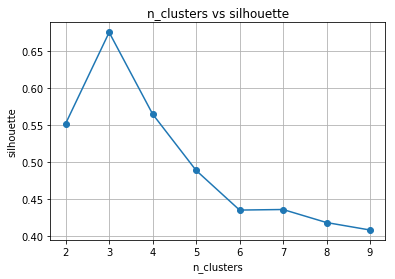

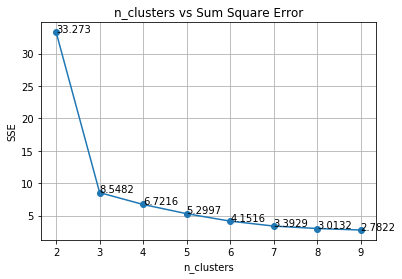

In [88]:
range_n_clusters = np.arange(2,10)
silhouette = []
sse = []
cluster_center = {}

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    clusterer = clusterer.fit(data_transform)
    silhouette.append(silhouette_score(data_transform, clusterer.predict(data_transform)))
    sse.append(clusterer.inertia_)
    cluster_center.update({'{}'.format(n_clusters):clusterer.cluster_centers_})
    
#plt.subplot(1, 2, 1)
plt.title('n_clusters vs silhouette')
plt.xlabel('n_clusters')
plt.ylabel('silhouette')
plt.grid()
plt.plot(range_n_clusters, silhouette, '-o')
plt.show() 
    
#plt.subplot(1, 2, 2)
plt.title('n_clusters vs Sum Square Error')
plt.xlabel('n_clusters')
plt.ylabel('SSE')
plt.grid()
plt.plot(range_n_clusters, sse, '-o')
for xy in zip(range_n_clusters, sse):
    plt.annotate('{:.5}'.format(xy[1]), textcoords='data', xy = xy)
plt.show()

In [83]:
from sklearn.metrics import v_measure_score

kmean = KMeans(n_clusters = 3, init = cluster_center['3'])
kmean.fit(data_transform)
Silhouette = silhouette_score(data_transform, kmean.labels_)
V_Measure = v_measure_score(raw_data.target, kmean.predict(data_transform))
print('V-measure score is {:>.5f}\nSilhouettee score is {:>.5f}'.format(V_Measure, Silhouette))

V-measure score is 0.94714
Silhouettee score is 0.67592


In [89]:
from sklearn.metrics import v_measure_score

kmean = KMeans(n_clusters = 3, init = cluster_center['3'])
kmean.fit(data_transform)
Silhouette = silhouette_score(data_transform, kmean.labels_)
V_Measure = v_measure_score(raw_data.target, kmean.predict(data_transform))
print('V-measure score is {:>.5f}\nSilhouettee score is {:>.5f}'.format(V_Measure, Silhouette))

V-measure score is 0.94714
Silhouettee score is 0.67592


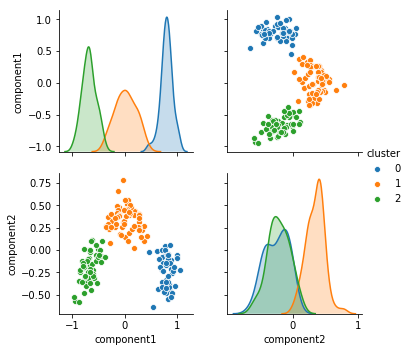

In [90]:
df['cluster'] = kmean.predict(data_transform)
sns.pairplot(df,hue='cluster', vars = ['component{}'.format(i) for i in [1,2]])